In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("salary_data.csv")
df = df.sample(frac=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 3 to 6
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


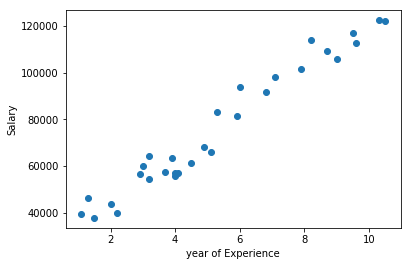

In [232]:
X=np.array(df.iloc[:,:1])
Y=np.array(df.iloc[:,1:])
plt.scatter(X,Y)
plt.xlabel("year of Experience")
plt.ylabel("Salary")
plt.show()

In [233]:
#Split the dataset into two part
#Training_sample has 75% of data and test_sample has 25% of data
split_value=round((len(X)-(len(X)*0.50)))
split_value

15

In [234]:
x_train=X[:split_value].copy()
y_train=Y[:split_value].copy()
x_test=X[split_value:].copy()
y_test=Y[split_value:].copy()

In [267]:
#Linear Resgression Model
# hypothesis fn = ax+b where: a:slope; b:Intercept
# for the prediction we have to find a,b
def gradient_descent(x_train,y_train):
    m=len(x_train)
    y=y_train[:].copy()
    a=b=0
    iteration =1000
    learning_rate=0.005
    for i in range(iteration):
        y_predict = a*x_train+b
        cost_Function=(1/(2*m))*(sum(value**2 for value in (y-y_predict)))
        temp0= (1/m)*(sum((y_predict-y)*x_train))
        temp1= (1/m)*(sum(y_predict-y))
        a=a-learning_rate*(temp0)
        b=b-learning_rate*(temp1)
        print("a {}, b{}, cost {}, itteration {}".format(a,b,cost_Function,i))
    cv=a,b
    return cv

In [268]:
a=gradient_descent(x_train,y_train)
new_y= (a[0][0]* x_test) + a[1][0]
new_y

a [2427.98133333], b[374.73], cost [3.2429792e+09], itteration 0
a [4391.17640524], b[683.73044093], cost [2.15118833e+09], itteration 1
a [5978.40090493], b[939.55384927], cost [1.43671863e+09], itteration 2
a [7261.49899447], b[1152.35413622], cost [9.69145508e+08], itteration 3
a [8298.58634743], b[1330.34494199], cost [6.63126911e+08], itteration 4
a [9136.67348487], b[1480.17039634], cost [4.62820108e+08], itteration 5
a [9813.78782592], b[1607.20503171], cost [3.31684953e+08], itteration 6
a [10360.69024197], b[1715.79638673], cost [2.45811756e+08], itteration 7
a [10802.2635997], b[1809.46125143], cost [1.8955545e+08], itteration 8
a [11158.63597144], b[1891.0444125], cost [1.52678834e+08], itteration 9
a [11446.08921476], b[1962.84706439], cost [1.28483298e+08], itteration 10
a [11677.79393413], b[2026.73068272], cost [1.12585671e+08], itteration 11
a [11864.40400107], b[2084.20104884], cost [1.02117866e+08], itteration 12
a [12014.53746914], b[2136.47621837], cost [95203181.35

a [11748.62846242], b[8736.07211533], cost [47557463.67637864], itteration 263
a [11745.51058411], b[8758.13282619], cost [47457993.06400898], itteration 264
a [11742.39670597], b[8780.16523369], cost [47358777.52465593], itteration 265
a [11739.28682286], b[8802.16937416], cost [47259816.40423442], itteration 266
a [11736.18092966], b[8824.14528385], cost [47161109.05033666], itteration 267
a [11733.07902123], b[8846.09299898], cost [47062654.81222773], itteration 268
a [11729.98109249], b[8868.01255572], cost [46964453.04084158], itteration 269
a [11726.8871383], b[8889.90399021], cost [46866503.08877637], itteration 270
a [11723.79715359], b[8911.76733853], cost [46768804.31029056], itteration 271
a [11720.71113325], b[8933.60263669], cost [46671356.06129839], itteration 272
a [11717.6290722], b[8955.40992071], cost [46574157.69936574], itteration 273
a [11714.55096536], b[8977.1892265], cost [46477208.5837059], itteration 274
a [11711.47680766], b[8998.94058998], cost [46380508.075

a [11036.75167928], b[13772.99349463], cost [28160201.33315489], itteration 533
a [11034.54712156], b[13788.59195799], cost [28110471.22305166], itteration 534
a [11032.34539223], b[13804.1704089], cost [28060868.63613241], itteration 535
a [11030.14648767], b[13819.72887304], cost [28011393.24538876], itteration 536
a [11027.95040424], b[13835.26737605], cost [27962044.72465086], itteration 537
a [11025.75713834], b[13850.78594354], cost [27912822.74858532], itteration 538
a [11023.56668635], b[13866.28460108], cost [27863726.99269294], itteration 539
a [11021.37904465], b[13881.76337423], cost [27814757.13330668], itteration 540
a [11019.19420965], b[13897.22228848], cost [27765912.84758948], itteration 541
a [11017.01217773], b[13912.66136933], cost [27717193.81353207], itteration 542
a [11014.83294531], b[13928.08064221], cost [27668599.709951], itteration 543
a [11012.65650879], b[13943.48013253], cost [27620130.21648638], itteration 544
a [11010.48286459], b[13958.85986569], cost

a [10522.53554776], b[17411.35660433], cost [18289879.36837255], itteration 810
a [10520.99071681], b[17422.28713641], cost [18265459.77701021], itteration 811
a [10519.44786785], b[17433.20364487], cost [18241102.80493493], itteration 812
a [10517.90699832], b[17444.10614772], cost [18216808.29157179], itteration 813
a [10516.3681057], b[17454.99466293], cost [18192576.07675758], itteration 814
a [10514.83118743], b[17465.86920843], cost [18168406.00073977], itteration 815
a [10513.29624099], b[17476.72980216], cost [18144297.90417557], itteration 816
a [10511.76326385], b[17487.57646201], cost [18120251.62813069], itteration 817
a [10510.23225349], b[17498.40920586], cost [18096267.01407846], itteration 818
a [10508.70320737], b[17509.22805157], cost [18072343.90389872], itteration 819
a [10507.17612298], b[17520.03301696], cost [18048482.13987675], itteration 820
a [10505.65099781], b[17530.82411984], cost [18024681.56470228], itteration 821
a [10504.12782933], b[17541.601378], cost

array([[124956.99674461],
       [ 60299.34880225],
       [103404.44743049],
       [ 49009.91820913],
       [117772.8136399 ],
       [ 80825.58624427],
       [ 71588.77939536],
       [ 57220.41318594],
       [ 61325.66067435],
       [ 60299.34880225],
       [ 52088.85382544],
       [ 73641.40313956],
       [100325.51181419],
       [ 52088.85382544],
       [ 50036.23008124]])

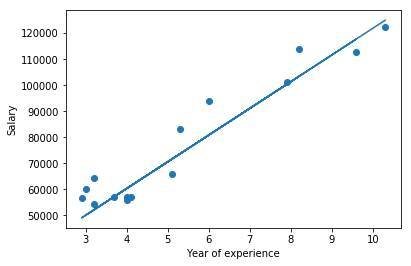

array([1.68229865e+09])

In [269]:
plt.scatter(x_test,y_test)
plt.plot(x_test,new_y)
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.show()
mse=(sum(new_y-y_test)**2)
mse